In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression

In [13]:
x, y = make_regression(n_samples=10, n_features=3)


In [14]:
x

array([[ 0.45385121, -1.02179006, -0.09607361],
       [ 0.71056295,  0.75560889,  1.71150789],
       [-0.37959711,  0.67073058,  0.56212747],
       [ 0.17926817,  0.2080285 , -1.49767898],
       [-1.86938155, -0.4029842 ,  0.26493081],
       [-0.30307817, -0.53981741,  0.47210295],
       [ 2.51144786, -1.49007197, -0.16155402],
       [ 0.47070991,  0.0539183 ,  0.96427601],
       [ 0.64526058, -0.59969112,  1.22450768],
       [-0.78487672,  1.03413122,  0.727089  ]])

In [15]:
df = pd.DataFrame(x)

In [16]:
df['y_true'] = y

In [17]:
df['y_pred_0'] = df['y_true'].mean()

In [18]:
df

,0,1,2,y_true,y_pred_0
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792
1,0.710563,0.755609,1.711508,48.480660,-2.345792
2,-0.379597,0.670731,0.562127,33.856202,-2.345792
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792
7,0.470710,0.053918,0.964276,10.843912,-2.345792
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792
9,-0.784877,1.034131,0.727089,50.783672,-2.345792


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

30.66952300419615

In [21]:
df['residual_0'] = df['y_true'] - df['y_pred_0']

In [22]:
df

,0,1,2,y_true,y_pred_0,residual_0
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792,-43.306769
1,0.710563,0.755609,1.711508,48.480660,-2.345792,50.826453
2,-0.379597,0.670731,0.562127,33.856202,-2.345792,36.201995
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792,-0.147394
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792,-16.246951
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792,-18.372940
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792,-61.674125
7,0.470710,0.053918,0.964276,10.843912,-2.345792,13.189704
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792,-13.599437
9,-0.784877,1.034131,0.727089,50.783672,-2.345792,53.129464


In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
tree_1 = DecisionTreeRegressor(max_depth = 1)

In [25]:
tree_1.fit(df[[0, 1, 2]], df['residual_0'])

DecisionTreeRegressor(max_depth=1)

In [27]:
df['tree_pred_1'] = tree_1.predict(df[[0, 1, 2]])

In [28]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792,-43.306769,-30.640044
1,0.710563,0.755609,1.711508,48.480660,-2.345792,50.826453,30.640044
2,-0.379597,0.670731,0.562127,33.856202,-2.345792,36.201995,30.640044
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792,-0.147394,30.640044
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792,-16.246951,-30.640044
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792,-18.372940,-30.640044
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792,-61.674125,-30.640044
7,0.470710,0.053918,0.964276,10.843912,-2.345792,13.189704,30.640044
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792,-13.599437,-30.640044
9,-0.784877,1.034131,0.727089,50.783672,-2.345792,53.129464,30.640044


In [29]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= -0.175\nsquared_error = 1335.629\nsamples = 10\nvalue = -0.0'),
 Text(0.25, 0.25, 'squared_error = 354.317\nsamples = 5\nvalue = -30.64'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'squared_error = 439.316\nsamples = 5\nvalue = 30.64'),
 Text(0.625, 0.5, '  False')]

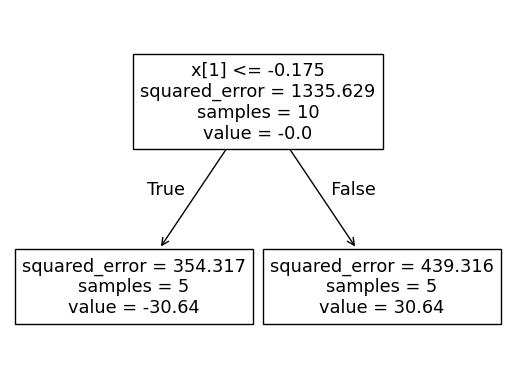

In [33]:
plot_tree(tree_1)

In [34]:
nu = 0.1

In [35]:
df['y_pred_1'] = df['y_pred_0'] + nu*df['tree_pred_1']

In [36]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792,-43.306769,-30.640044,-5.409797
1,0.710563,0.755609,1.711508,48.480660,-2.345792,50.826453,30.640044,0.718212
2,-0.379597,0.670731,0.562127,33.856202,-2.345792,36.201995,30.640044,0.718212
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792,-0.147394,30.640044,0.718212
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792,-16.246951,-30.640044,-5.409797
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792,-18.372940,-30.640044,-5.409797
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792,-61.674125,-30.640044,-5.409797
7,0.470710,0.053918,0.964276,10.843912,-2.345792,13.189704,30.640044,0.718212
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792,-13.599437,-30.640044,-5.409797
9,-0.784877,1.034131,0.727089,50.783672,-2.345792,53.129464,30.640044,0.718212


In [37]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

30.66952300419615

In [38]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

28.21831947127266

In [39]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792,-43.306769,-30.640044,-5.409797
1,0.710563,0.755609,1.711508,48.480660,-2.345792,50.826453,30.640044,0.718212
2,-0.379597,0.670731,0.562127,33.856202,-2.345792,36.201995,30.640044,0.718212
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792,-0.147394,30.640044,0.718212
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792,-16.246951,-30.640044,-5.409797
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792,-18.372940,-30.640044,-5.409797
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792,-61.674125,-30.640044,-5.409797
7,0.470710,0.053918,0.964276,10.843912,-2.345792,13.189704,30.640044,0.718212
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792,-13.599437,-30.640044,-5.409797
9,-0.784877,1.034131,0.727089,50.783672,-2.345792,53.129464,30.640044,0.718212


In [40]:
df['residual_1'] = df['y_true'] - df['y_pred_0']

In [41]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792,-43.306769,-30.640044,-5.409797,-43.306769
1,0.710563,0.755609,1.711508,48.480660,-2.345792,50.826453,30.640044,0.718212,50.826453
2,-0.379597,0.670731,0.562127,33.856202,-2.345792,36.201995,30.640044,0.718212,36.201995
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792,-0.147394,30.640044,0.718212,-0.147394
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792,-16.246951,-30.640044,-5.409797,-16.246951
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792,-18.372940,-30.640044,-5.409797,-18.372940
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792,-61.674125,-30.640044,-5.409797,-61.674125
7,0.470710,0.053918,0.964276,10.843912,-2.345792,13.189704,30.640044,0.718212,13.189704
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792,-13.599437,-30.640044,-5.409797,-13.599437
9,-0.784877,1.034131,0.727089,50.783672,-2.345792,53.129464,30.640044,0.718212,53.129464


In [43]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [45]:
tree_2.fit(df[[0, 1, 2]], df['residual_1'])

DecisionTreeRegressor(max_depth=1)

In [46]:
df['y_pred_2'] = df['y_pred_1'] + nu*tree_2.predict(df[[0, 1, 2]])

In [47]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,0.453851,-1.021790,-0.096074,-45.652561,-2.345792,-43.306769,-30.640044,-5.409797,-43.306769,-8.473801
1,0.710563,0.755609,1.711508,48.480660,-2.345792,50.826453,30.640044,0.718212,50.826453,3.782216
2,-0.379597,0.670731,0.562127,33.856202,-2.345792,36.201995,30.640044,0.718212,36.201995,3.782216
3,0.179268,0.208028,-1.497679,-2.493187,-2.345792,-0.147394,30.640044,0.718212,-0.147394,3.782216
4,-1.869382,-0.402984,0.264931,-18.592743,-2.345792,-16.246951,-30.640044,-5.409797,-16.246951,-8.473801
5,-0.303078,-0.539817,0.472103,-20.718732,-2.345792,-18.372940,-30.640044,-5.409797,-18.372940,-8.473801
6,2.511448,-1.490072,-0.161554,-64.019917,-2.345792,-61.674125,-30.640044,-5.409797,-61.674125,-8.473801
7,0.470710,0.053918,0.964276,10.843912,-2.345792,13.189704,30.640044,0.718212,13.189704,3.782216
8,0.645261,-0.599691,1.224508,-15.945229,-2.345792,-13.599437,-30.640044,-5.409797,-13.599437,-8.473801
9,-0.784877,1.034131,0.727089,50.783672,-2.345792,53.129464,30.640044,0.718212,53.129464,3.782216


In [48]:
mean_absolute_error(df['y_true'], df['y_pred_1'])

28.21831947127266

In [49]:
mean_absolute_error(df['y_true'], df['y_pred_2'])

25.767115938349168

In [50]:
df = df[[0, 1, 2, 'y_true']].copy()

In [56]:
n = 10
nu = 0.1
trees = []

df['y_pred'] = df['y_true'].mean()

for i in range(n):
  df['residual'] = df['y_true'] - df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0, 1, 2,]], df['residual'])
  df['y_pred'] += nu * tree.predict(df[[0, 1, 2]])
  trees.append(tree)
  print(mean_absolute_error(df['y_true'], df['y_pred']))

28.21831947127266
25.973189793883783
24.021251089523556
22.030872997071906
21.16148242687681
19.52235464473619
17.989038808786045
17.27223898787822
15.941674276178258
15.318730515889545


In [57]:
test = df[[0, 1, 2]].copy()

In [58]:
test['y_pred'] = df['y_true'].mean()

In [59]:
trees

[DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1),
 DecisionTreeRegressor(max_depth=1)]

In [60]:
for tree in trees:
  test['y_pred'] += nu * tree.predict(df[[0, 1, 2]])

In [61]:
test

,0,1,2,y_pred
0,0.453851,-1.021790,-0.096074,-26.803770
1,0.710563,0.755609,1.711508,21.867309
2,-0.379597,0.670731,0.562127,21.867309
3,0.179268,0.208028,-1.497679,1.768867
4,-1.869382,-0.402984,0.264931,-12.996681
5,-0.303078,-0.539817,0.472103,-12.996681
6,2.511448,-1.490072,-0.161554,-26.803770
7,0.470710,0.053918,0.964276,1.768867
8,0.645261,-0.599691,1.224508,-12.996681
9,-0.784877,1.034131,0.727089,21.867309


sympy пожет помочь посчитать производную

In [62]:
from sympy import *

In [69]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')
type(y_true)

sympy.core.symbol.Symbol

In [65]:
1/2 * (y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [66]:
diff(1/2 * (y_true - y_pred) ** 2, y_pred)

1.0*y_pred - 1.0*y_true

In [67]:
-(y_true-y_pred)

y_pred - y_true

In [70]:
from sklearn.datasets import make_classification


In [72]:
X, y = make_classification(n_samples=10, n_features=3, n_redundant=0)

In [73]:
df = pd.DataFrame(x)

In [74]:
df['y_true'] = y

In [75]:
df

,0,1,2,y_true
0,0.453851,-1.021790,-0.096074,0
1,0.710563,0.755609,1.711508,1
2,-0.379597,0.670731,0.562127,0
3,0.179268,0.208028,-1.497679,1
4,-1.869382,-0.402984,0.264931,0
5,-0.303078,-0.539817,0.472103,1
6,2.511448,-1.490072,-0.161554,1
7,0.470710,0.053918,0.964276,0
8,0.645261,-0.599691,1.224508,0
9,-0.784877,1.034131,0.727089,1


In [76]:
df['y_pred'] = df['y_true'].mean()

In [77]:
df

,0,1,2,y_true,y_pred
0,0.453851,-1.021790,-0.096074,0,0.5
1,0.710563,0.755609,1.711508,1,0.5
2,-0.379597,0.670731,0.562127,0,0.5
3,0.179268,0.208028,-1.497679,1,0.5
4,-1.869382,-0.402984,0.264931,0,0.5
5,-0.303078,-0.539817,0.472103,1,0.5
6,2.511448,-1.490072,-0.161554,1,0.5
7,0.470710,0.053918,0.964276,0,0.5
8,0.645261,-0.599691,1.224508,0,0.5
9,-0.784877,1.034131,0.727089,1,0.5


In [78]:
from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(df['y_true'], df['y_pred'])

0.5

In [80]:
n = 10
nu = 0.1
trees = []

df['y_pred'] = df['y_true'].mean()

for i in range(n):
  df['residual'] = df['y_true'] - df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0, 1, 2,]], df['residual'])
  df['y_pred'] += nu * tree.predict(df[[0, 1, 2]])
  trees.append(tree)
  print(roc_auc_score(df['y_true'], df['y_pred']))

0.7
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9
0.9


In [81]:
df

,0,1,2,y_true,y_pred,residual
0,0.453851,-1.021790,-0.096074,0,0.391250,-0.400537
1,0.710563,0.755609,1.711508,1,0.660554,0.330159
2,-0.379597,0.670731,0.562127,0,0.391250,-0.400537
3,0.179268,0.208028,-1.497679,1,0.665694,0.371451
4,-1.869382,-0.402984,0.264931,0,0.391250,-0.400537
5,-0.303078,-0.539817,0.472103,1,0.391250,0.599463
6,2.511448,-1.490072,-0.161554,1,0.665694,0.371451
7,0.470710,0.053918,0.964276,0,0.391250,-0.400537
8,0.645261,-0.599691,1.224508,0,0.391250,-0.400537
9,-0.784877,1.034131,0.727089,1,0.660554,0.330159


-----------------------------------------------------------
-----------------------------------------------------------
-----------------------------------------------------------
-----------------------------------------------------------



---



---



---



---



---



---



# Пример с реальными данными

__Задача:__


Предсказать цену автомобиля на основе следующих характеристик:
* Марка автомобиля (например, Toyota, Ford, Honda)
* Модель автомобиля (например, Camry, Mustang, Civic)
* Год выпуска автомобиля
* Тип топлива (например, бензин, дизель, электро)
* Объем двигателя (в литрах)
* Количество дверей (2 или 4)
* Тип трансмиссии (например, автомат, механика)

In [95]:
import pandas as pd

data = {
    'Марка': ['Toyota', 'Ford', 'Honda', 'Toyota', 'Ford', 'Honda', 'Toyota', 'Ford', 'Honda'],
    'Модель': ['Camry', 'Mustang', 'Civic', 'Corolla', 'Fusion', 'Accord', 'Camry', 'Mustang', 'Civic'],
    'Год': [2015, 2018, 2012, 2016, 2019, 2014, 2017, 2015, 2018],
    'Тип топлива': ['Бензин', 'Бензин', 'Дизель', 'Бензин', 'Электро', 'Дизель', 'Бензин', 'Бензин', 'Электро'],
    'Объем двигателя': [2.5, 5.0, 1.8, 1.6, 2.0, 2.4, 2.5, 5.0, 1.8],
    'Количество дверей': [4, 2, 4, 4, 4, 4, 4, 2, 4],
    'Тип трансмиссии': ['Автомат', 'Механика', 'Автомат', 'Автомат', 'Автомат', 'Механика', 'Автомат', 'Механика', 'Автомат'],
    'Цена': [15000, 20000, 12000, 18000, 25000, 15000, 16000, 22000, 18000]
}

df = pd.DataFrame(data)


In [96]:
from sklearn.preprocessing import LabelEncoder

# Создаем LabelEncoder
le = LabelEncoder()

# Преобразуем категориальные данные в числовые
df['Марка'] = le.fit_transform(df['Марка'])
df['Модель'] = le.fit_transform(df['Модель'])
df['Тип топлива'] = le.fit_transform(df['Тип топлива'])
df['Тип трансмиссии'] = le.fit_transform(df['Тип трансмиссии'])


# Дерево решений

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Разделяем данные на обучающую и тестовую выборки
X = df.drop('Цена', axis=1)
y = df['Цена']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем дерево решений
tree = DecisionTreeRegressor(random_state=42)

# Обучаем дерево на обучающей выборке
tree.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred = tree.predict(X_test)

# Оцениваем качество модели
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse:.2f}')


Среднеквадратичная ошибка: 26500000.00


## Визуализация

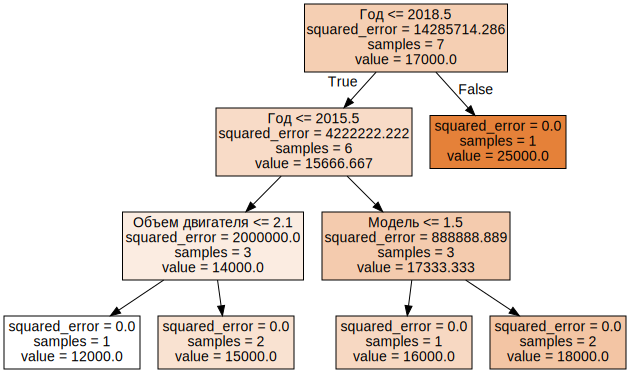

In [102]:
import graphviz
from sklearn.tree import export_graphviz

# Экспортируем дерево решений в формате dot
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True)

# Создаем график
graph = graphviz.Source(dot_data)
graph

# Бэггинг

### Бэггинг - это метод, который позволяет уменьшить ошибку модели, создав несколько моделей, которые учатся на своих ошибках. Идея заключается в том, чтобы создать несколько моделей, каждая из которых обучается на случайной подвыборке данных. Затем мы объединяем прогнозы этих моделей, чтобы получить окончательный прогноз.

In [100]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


# Создаем бэггинг-модель
bagging = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), n_estimators=10, random_state=42)

# Обучаем бэггинг-модель на обучающей выборке
bagging.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred = bagging.predict(X_test)

# Оцениваем качество модели
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse:.2f}')


Среднеквадратичная ошибка: 11080000.00


# Градиентный бустинг

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Создаем градиентный бустинг-модель
gbr = GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, random_state=42)

# Обучаем градиентный бустинг-модель на обучающей выборке
gbr.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred = gbr.predict(X_test)

# Оцениваем качество модели
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse:.2f}')


Среднеквадратичная ошибка: 10699137.18
